In [1]:
from src.utils.Preprocessing import Preprocessing
from src.engine.MLP import EngineMLP
from config import FRAME_SIZE, HOP, N_MELS, SAMPLERATE, N_MFCC, MAX_SIZE,DEVICE, OUT_DIM
from Dataset import SignalDataset 
from torch.utils.data import DataLoader

# Modelo incluyendo Deltas

In [2]:
preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE,
                  max_large=MAX_SIZE,
                  include_deltas=True)

In [3]:
model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = 50,
                        output_dim = OUT_DIM,
                        n_layers = 1,
                        batch_size = 28,
                        learning_rate = 0.002,
                        dropout = 0.2,
                        preprocessing = preprocessing)


## Se entrena modelo y se genera model.pth

In [ ]:
model.train(epochs=100, patience=20, delta=0.01)

## Se carga modelo (solo si se tiene disponible)

In [4]:
model.load_model("model.pth")

c:\Users\sebas\Desktop\DL_señales\T1\src\engine\MLP.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


## Se evalua modelo

Evaluación:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 990/990 [00:08<00:00, 120.19it/s]


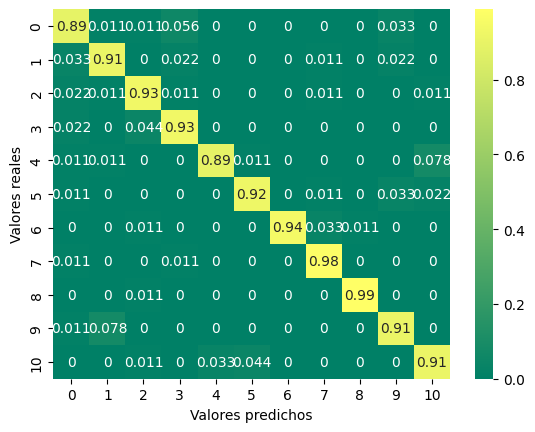

Accuracy: 0.9282828569412231


In [5]:
model.evaluate(DataLoader(SignalDataset("validation",preprocessing),shuffle=False))